**BDA FINAL MINI-PROJECT REVIEW**\
**TITLE:** Prediction of Shopper Purchase Intent\
**TEAM MEMBERS:**
* Archanaa S (21ALR004)
* Shree Nandhini VN (21ALR038)
* Sree Harene J S(21ALR040)

**MENTOR:** Mr.N.Adhithyaa


**DATASET DESCRIPTION:**
* The dataset is collected from github.
* It consists of **18** attributes and **12330** rows.

In [45]:
!pip install pyspark

In [46]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]").appName("SparkByExamples.com").getOrCreate()

In [47]:
import pandas as pd
url_github = 'https://raw.githubusercontent.com/sharmaroshan/Online-Shoppers-Purchasing-Intention/master/online_shoppers_intention.csv'
pd_df=pd.read_csv(url_github)
df=spark.createDataFrame(pd_df)
df.show()

+--------------+-----------------------+-------------+----------------------+--------------+-----------------------+-----------+-----------+----------+----------+-----+----------------+-------+------+-----------+-----------------+-------+-------+
|Administrative|Administrative_Duration|Informational|Informational_Duration|ProductRelated|ProductRelated_Duration|BounceRates|  ExitRates|PageValues|SpecialDay|Month|OperatingSystems|Browser|Region|TrafficType|      VisitorType|Weekend|Revenue|
+--------------+-----------------------+-------------+----------------------+--------------+-----------------------+-----------+-----------+----------+----------+-----+----------------+-------+------+-----------+-----------------+-------+-------+
|             0|                    0.0|            0|                   0.0|             1|                    0.0|        0.2|        0.2|       0.0|       0.0|  Feb|               1|      1|     1|          1|Returning_Visitor|  false|  false|
|           

In [48]:
df_backup=df
df_backup.show(5)

+--------------+-----------------------+-------------+----------------------+--------------+-----------------------+-----------+---------+----------+----------+-----+----------------+-------+------+-----------+-----------------+-------+-------+
|Administrative|Administrative_Duration|Informational|Informational_Duration|ProductRelated|ProductRelated_Duration|BounceRates|ExitRates|PageValues|SpecialDay|Month|OperatingSystems|Browser|Region|TrafficType|      VisitorType|Weekend|Revenue|
+--------------+-----------------------+-------------+----------------------+--------------+-----------------------+-----------+---------+----------+----------+-----+----------------+-------+------+-----------+-----------------+-------+-------+
|             0|                    0.0|            0|                   0.0|             1|                    0.0|        0.2|      0.2|       0.0|       0.0|  Feb|               1|      1|     1|          1|Returning_Visitor|  false|  false|
|             0|    

In [49]:
k = df.toPandas()
k

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [50]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go


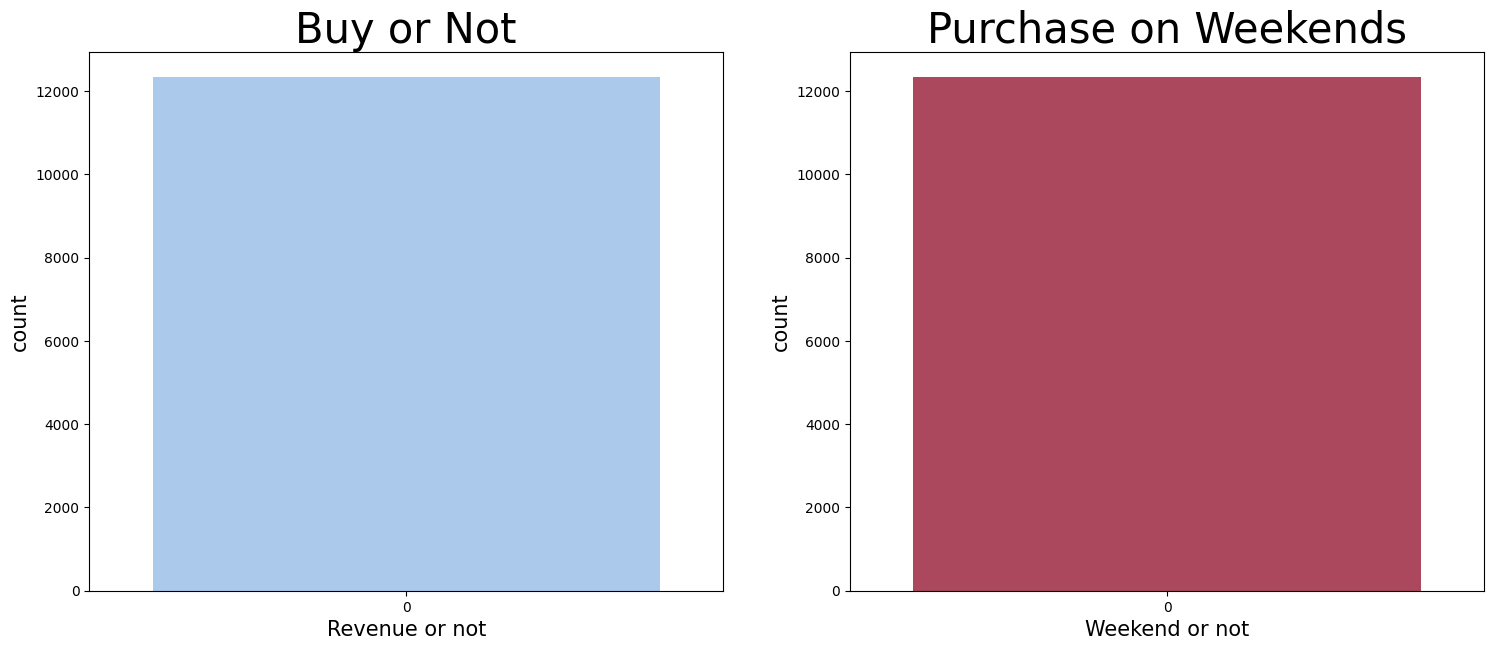

In [51]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.countplot(k['Weekend'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)


# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(k['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

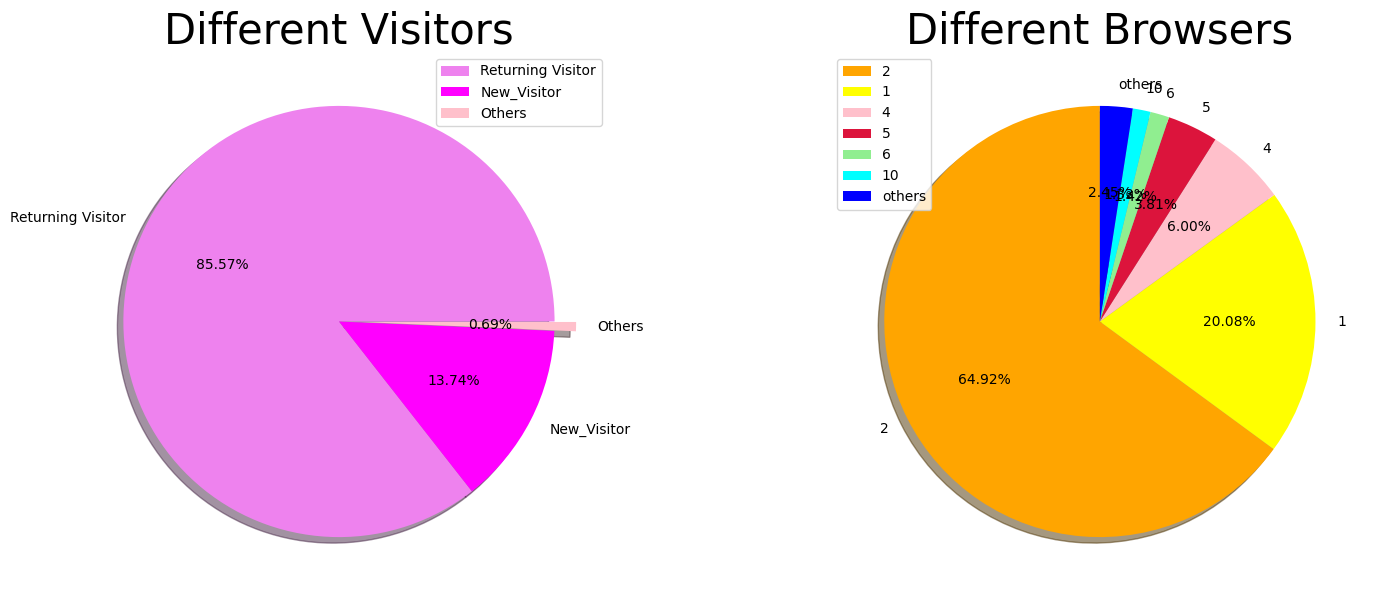

In [52]:

# plotting a pie chart for browsers

plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['violet', 'magenta', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()

# plotting a pie chart for browsers
size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

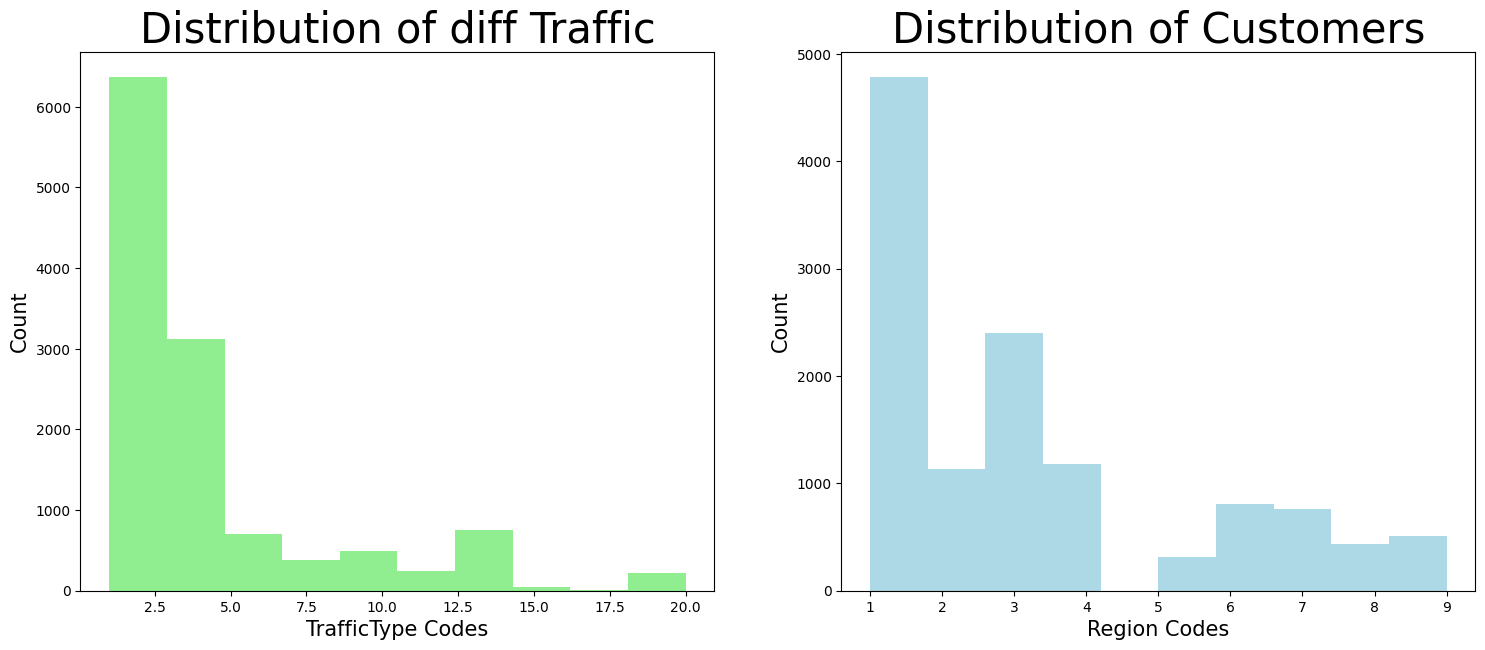

In [53]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(k['TrafficType'], color = 'lightgreen')
plt.title('Distribution of diff Traffic',fontsize = 30)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# visualizing the distribution of customers around the Region

plt.subplot(1, 2, 2)
plt.hist(k['Region'], color = 'lightblue')
plt.title('Distribution of Customers',fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

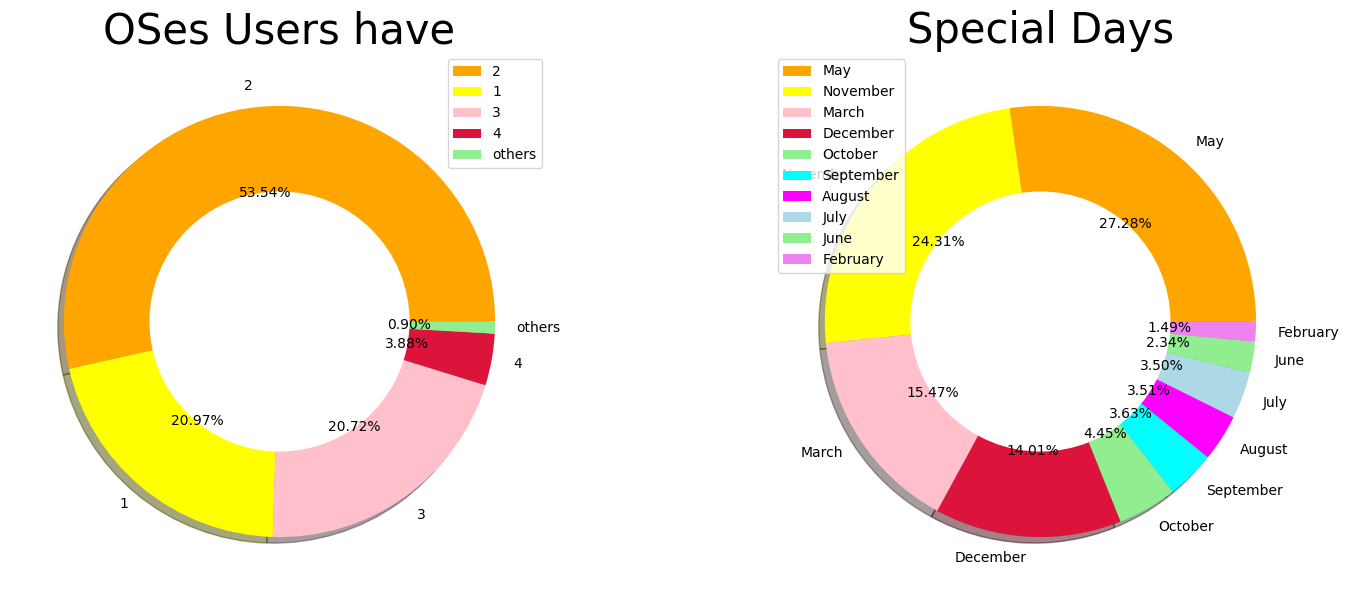

In [54]:
size = [6601, 2585, 2555, 478, 111]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('OSes Users have', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

# plotting a pie chart for share of special days

size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Special Days', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

plt.show()

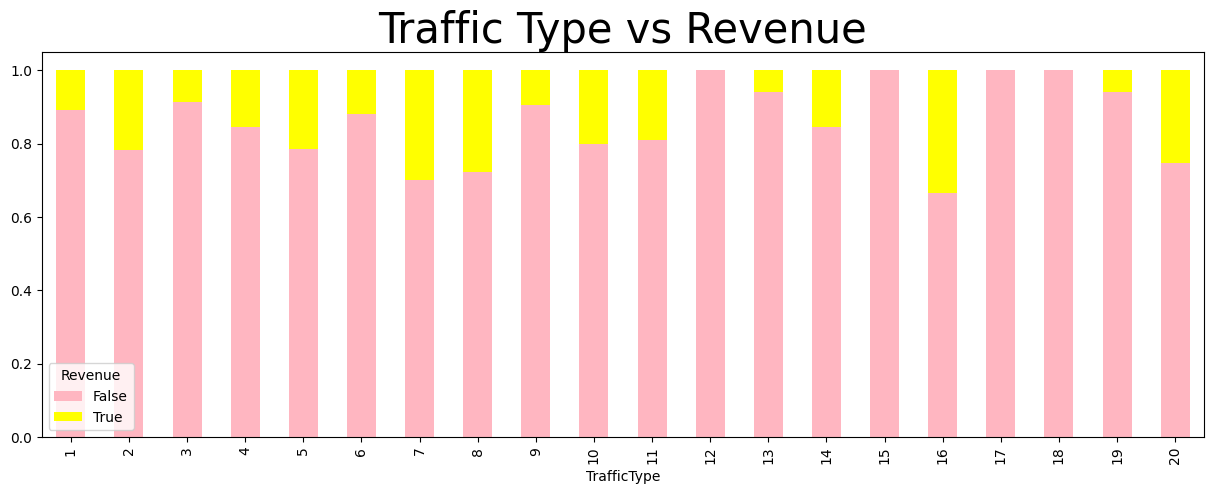

In [55]:
#Traffic type vs Revenue
df = pd.crosstab(k['TrafficType'], k['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightpink', 'yellow'])
plt.title('Traffic Type vs Revenue', fontsize = 30)
plt.show()

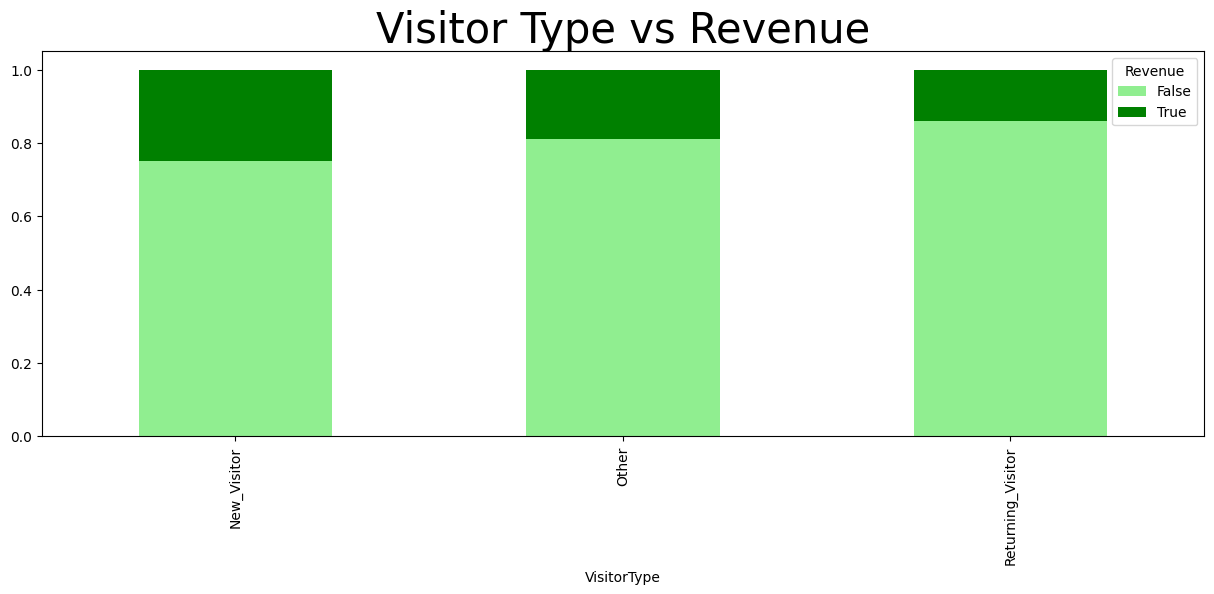

In [56]:
#Visitor Type vs Revenue
df = pd.crosstab(k['VisitorType'], k['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.show()

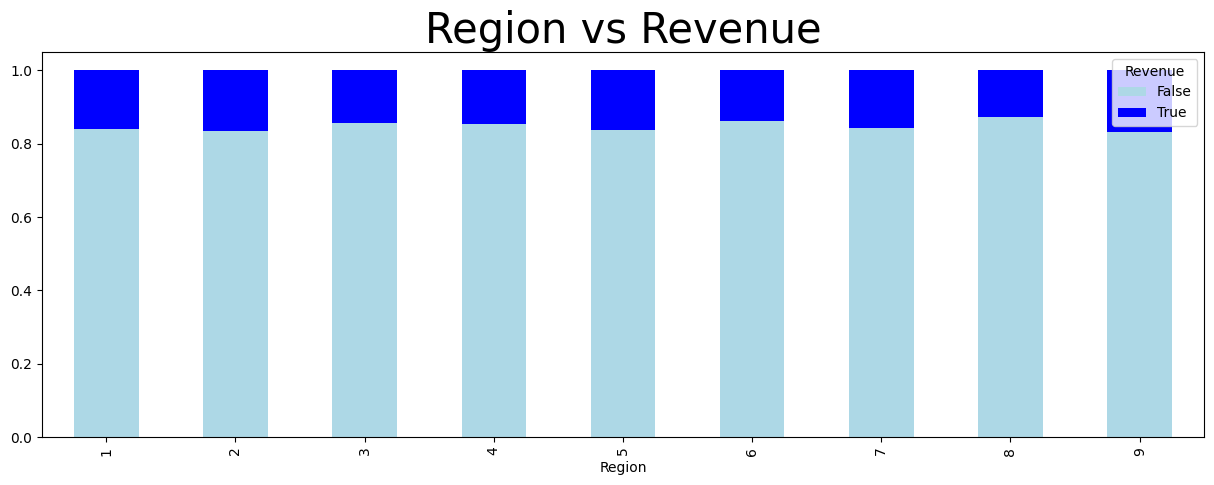

In [57]:
#Region vs Revenue
df = pd.crosstab(k['Region'], k['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightblue', 'blue'])
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

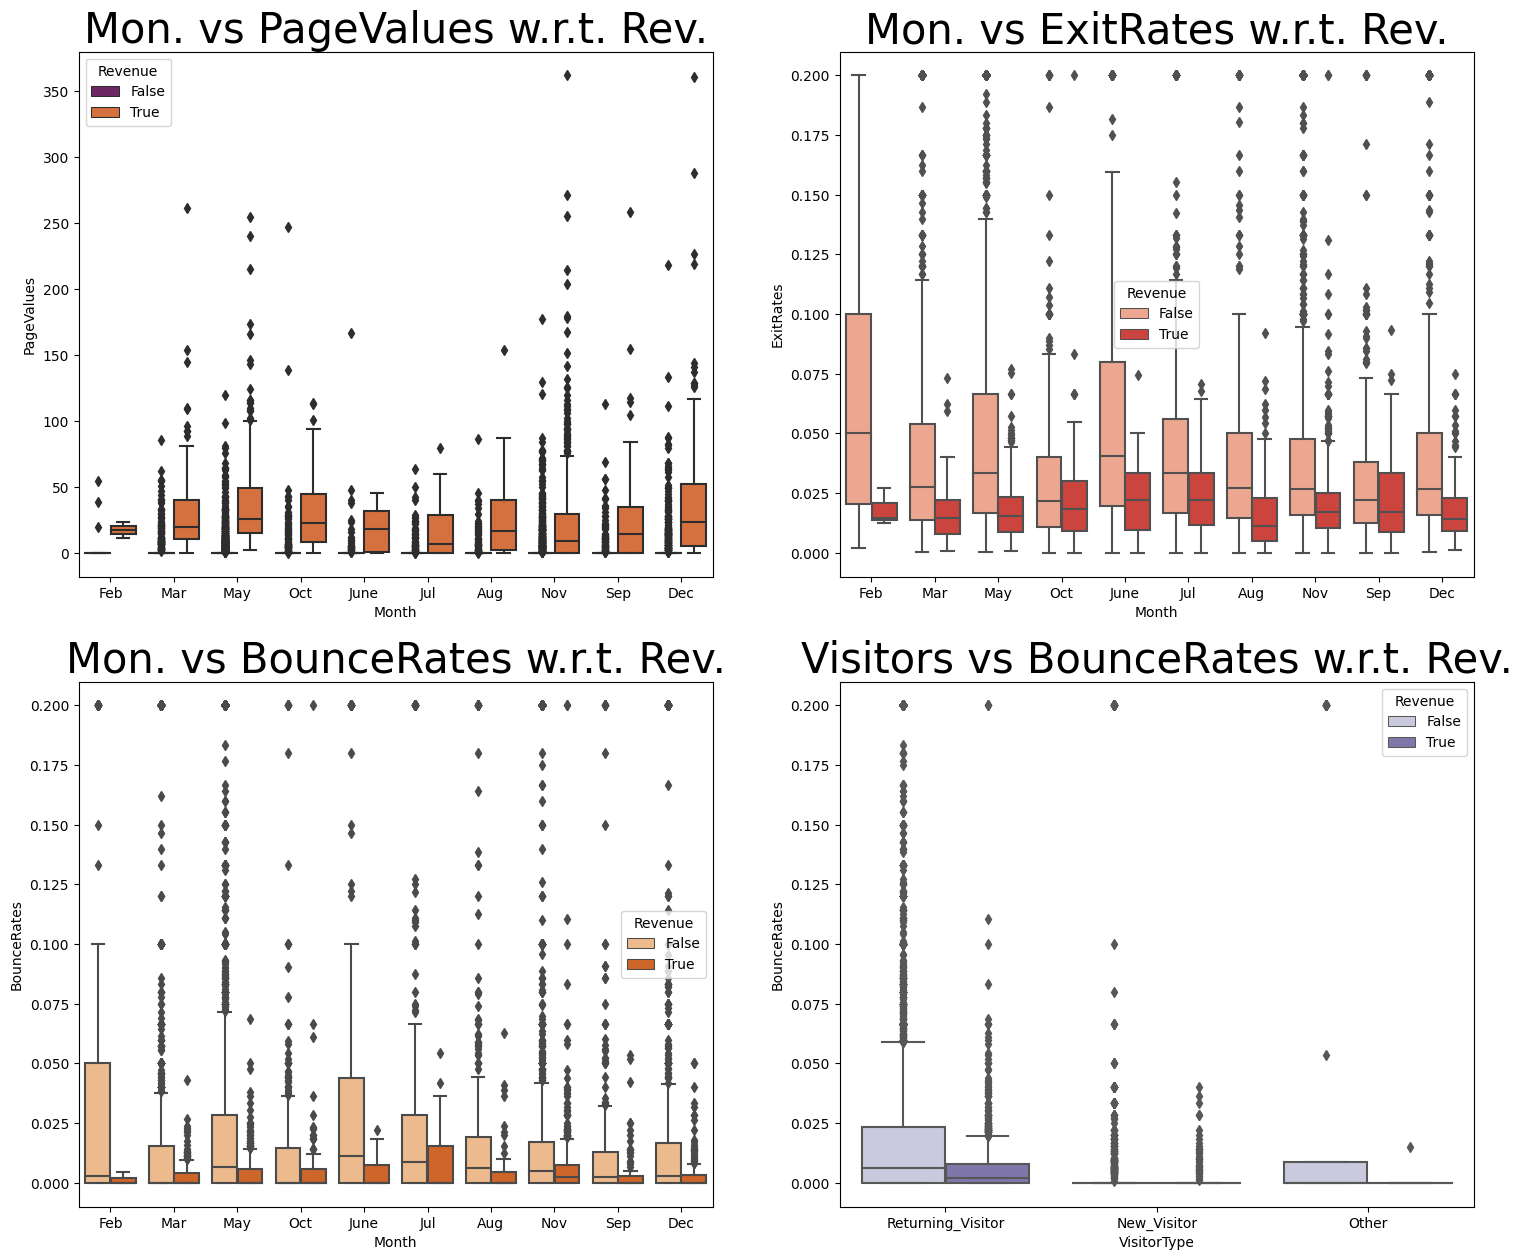

In [58]:
# month vs pagevalues wrt revenue

plt.rcParams['figure.figsize'] = (18, 15)
plt.subplot(2, 2, 1)
sns.boxplot(x = k['Month'], y = k['PageValues'], hue = k['Revenue'], palette = 'inferno')
plt.title('Mon. vs PageValues w.r.t. Rev.', fontsize = 30)

# month vs exitrates wrt revenue
plt.subplot(2, 2, 2)
sns.boxplot(x = k['Month'], y = k['ExitRates'], hue = k['Revenue'], palette = 'Reds')
plt.title('Mon. vs ExitRates w.r.t. Rev.', fontsize = 30)

# month vs bouncerates wrt revenue
plt.subplot(2, 2, 3)
sns.boxplot(x = k['Month'], y = k['BounceRates'], hue = k['Revenue'], palette = 'Oranges')
plt.title('Mon. vs BounceRates w.r.t. Rev.', fontsize = 30)

# visitor type vs exit rates w.r.t revenue
plt.subplot(2, 2, 4)
sns.boxplot(x = k['VisitorType'], y = k['BounceRates'], hue = k['Revenue'], palette = 'Purples')
plt.title('Visitors vs BounceRates w.r.t. Rev.', fontsize = 30)

plt.show()

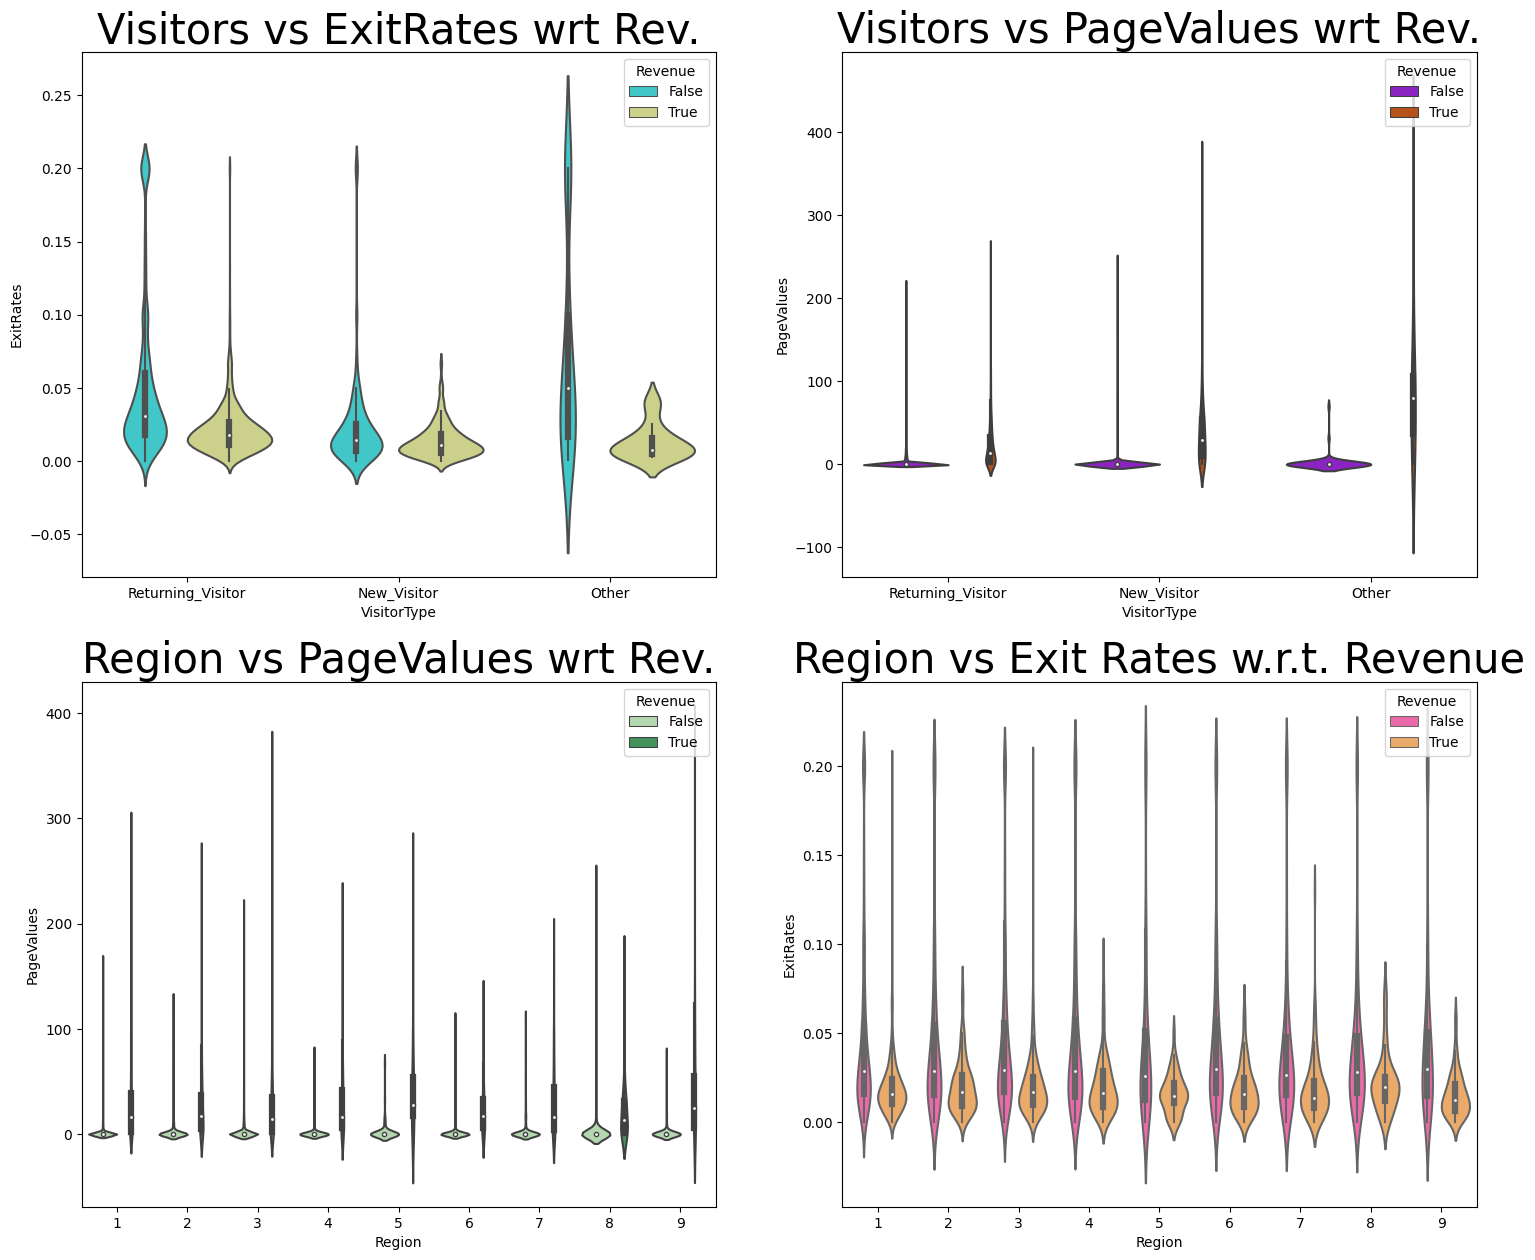

In [59]:
plt.rcParams['figure.figsize'] = (18, 15)
plt.subplot(2, 2, 1)
sns.violinplot(x = k['VisitorType'], y = k['ExitRates'], hue = k['Revenue'], palette = 'rainbow')
plt.title('Visitors vs ExitRates wrt Rev.', fontsize = 30)

# visitor type vs exit rates w.r.t revenue
plt.subplot(2, 2, 2)
sns.violinplot(x = k['VisitorType'], y = k['PageValues'], hue = k['Revenue'], palette = 'gnuplot')
plt.title('Visitors vs PageValues wrt Rev.', fontsize = 30)

# region vs pagevalues w.r.t. revenue
plt.subplot(2, 2, 3)
sns.violinplot(x = k['Region'], y = k['PageValues'], hue = k['Revenue'], palette = 'Greens')
plt.title('Region vs PageValues wrt Rev.', fontsize = 30)

#region vs exit rates w.r.t. revenue
plt.subplot(2, 2, 4)
sns.violinplot(x = k['Region'], y = k['ExitRates'], hue = k['Revenue'], palette = 'spring')
plt.title('Region vs Exit Rates w.r.t. Revenue', fontsize = 30)

plt.show()

In [60]:
df_backup.printSchema()

root
 |-- Administrative: long (nullable = true)
 |-- Administrative_Duration: double (nullable = true)
 |-- Informational: long (nullable = true)
 |-- Informational_Duration: double (nullable = true)
 |-- ProductRelated: long (nullable = true)
 |-- ProductRelated_Duration: double (nullable = true)
 |-- BounceRates: double (nullable = true)
 |-- ExitRates: double (nullable = true)
 |-- PageValues: double (nullable = true)
 |-- SpecialDay: double (nullable = true)
 |-- Month: string (nullable = true)
 |-- OperatingSystems: long (nullable = true)
 |-- Browser: long (nullable = true)
 |-- Region: long (nullable = true)
 |-- TrafficType: long (nullable = true)
 |-- VisitorType: string (nullable = true)
 |-- Weekend: boolean (nullable = true)
 |-- Revenue: boolean (nullable = true)



In [61]:
import pyspark.sql.functions as F
df_backup = df_backup.withColumn('Weekend', F.when(df_backup.Weekend == 'false', 0).otherwise(1))#.withColumn('Revenue', F.when(df_backup.Revenue == 'false', 0).otherwise(1))
df_backup.show()

+--------------+-----------------------+-------------+----------------------+--------------+-----------------------+-----------+-----------+----------+----------+-----+----------------+-------+------+-----------+-----------------+-------+-------+
|Administrative|Administrative_Duration|Informational|Informational_Duration|ProductRelated|ProductRelated_Duration|BounceRates|  ExitRates|PageValues|SpecialDay|Month|OperatingSystems|Browser|Region|TrafficType|      VisitorType|Weekend|Revenue|
+--------------+-----------------------+-------------+----------------------+--------------+-----------------------+-----------+-----------+----------+----------+-----+----------------+-------+------+-----------+-----------------+-------+-------+
|             0|                    0.0|            0|                   0.0|             1|                    0.0|        0.2|        0.2|       0.0|       0.0|  Feb|               1|      1|     1|          1|Returning_Visitor|      0|  false|
|           

In [62]:
from pyspark.ml.feature import StringIndexer
input_column = 'VisitorType'
output_column = 'Visitor_Type'
string_indexer = StringIndexer(inputCol=input_column, outputCol=output_column)
df_backup = string_indexer.fit(df_backup).transform(df_backup)
df_backup.show()


+--------------+-----------------------+-------------+----------------------+--------------+-----------------------+-----------+-----------+----------+----------+-----+----------------+-------+------+-----------+-----------------+-------+-------+------------+
|Administrative|Administrative_Duration|Informational|Informational_Duration|ProductRelated|ProductRelated_Duration|BounceRates|  ExitRates|PageValues|SpecialDay|Month|OperatingSystems|Browser|Region|TrafficType|      VisitorType|Weekend|Revenue|Visitor_Type|
+--------------+-----------------------+-------------+----------------------+--------------+-----------------------+-----------+-----------+----------+----------+-----+----------------+-------+------+-----------+-----------------+-------+-------+------------+
|             0|                    0.0|            0|                   0.0|             1|                    0.0|        0.2|        0.2|       0.0|       0.0|  Feb|               1|      1|     1|          1|Returnin

In [63]:
from pyspark.ml.feature import StringIndexer
input_column = 'Month'
output_column = 'Months'
string_indexer = StringIndexer(inputCol=input_column, outputCol=output_column)
df_backup = string_indexer.fit(df_backup).transform(df_backup)
df_backup.show()

+--------------+-----------------------+-------------+----------------------+--------------+-----------------------+-----------+-----------+----------+----------+-----+----------------+-------+------+-----------+-----------------+-------+-------+------------+------+
|Administrative|Administrative_Duration|Informational|Informational_Duration|ProductRelated|ProductRelated_Duration|BounceRates|  ExitRates|PageValues|SpecialDay|Month|OperatingSystems|Browser|Region|TrafficType|      VisitorType|Weekend|Revenue|Visitor_Type|Months|
+--------------+-----------------------+-------------+----------------------+--------------+-----------------------+-----------+-----------+----------+----------+-----+----------------+-------+------+-----------+-----------------+-------+-------+------------+------+
|             0|                    0.0|            0|                   0.0|             1|                    0.0|        0.2|        0.2|       0.0|       0.0|  Feb|               1|      1|     1

In [64]:
columns_to_remove = ['VisitorType', 'Month']
df_backup = df_backup.drop(*columns_to_remove)


In [65]:
df_backup.show()

+--------------+-----------------------+-------------+----------------------+--------------+-----------------------+-----------+-----------+----------+----------+----------------+-------+------+-----------+-------+-------+------------+------+
|Administrative|Administrative_Duration|Informational|Informational_Duration|ProductRelated|ProductRelated_Duration|BounceRates|  ExitRates|PageValues|SpecialDay|OperatingSystems|Browser|Region|TrafficType|Weekend|Revenue|Visitor_Type|Months|
+--------------+-----------------------+-------------+----------------------+--------------+-----------------------+-----------+-----------+----------+----------+----------------+-------+------+-----------+-------+-------+------------+------+
|             0|                    0.0|            0|                   0.0|             1|                    0.0|        0.2|        0.2|       0.0|       0.0|               1|      1|     1|          1|      0|  false|         0.0|   9.0|
|             0|            

In [66]:
from pyspark.sql.types import IntegerType
df_backup=df_backup.withColumn("Months",df_backup["Months"].cast(IntegerType()))
df_backup=df_backup.withColumn("Visitor_Type",df_backup["Visitor_Type"].cast(IntegerType()))

In [67]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Months','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Visitor_Type','Weekend'],outputCol=vector_col)
mygraph_vector=assembler.transform(df_backup).select(vector_col)
matrix = Correlation.corr(mygraph_vector,vector_col)
matrix.show()

+----------------------+
|pearson(corr_features)|
+----------------------+
|  1.0              ...|
+----------------------+



In [68]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

vector_col = "corr_features"
assembler = VectorAssembler(inputCols=['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Months', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Visitor_Type', 'Weekend'], outputCol=vector_col)

mygraph_vector = assembler.transform(df_backup).select(vector_col)
correlation_matrix = Correlation.corr(mygraph_vector, vector_col)

# If you want to show the correlation matrix
correlation_matrix.show(truncate=False)



+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|pearson(corr_features)                                                                                                  

In [69]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import pandas as pd
input_columns=['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Months', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Visitor_Type', 'Weekend','Revenue']
# Assuming 'input_columns' is a list of columns for which you want to compute correlations
vector_assembler = VectorAssembler(inputCols=input_columns, outputCol="features")
df_with_features = vector_assembler.transform(df_backup)
correlation_matrix = Correlation.corr(df_with_features, column="features").head()[0]

# Convert the correlation matrix to a Pandas DataFrame
correlation_df = pd.DataFrame(correlation_matrix.toArray(), columns=input_columns)


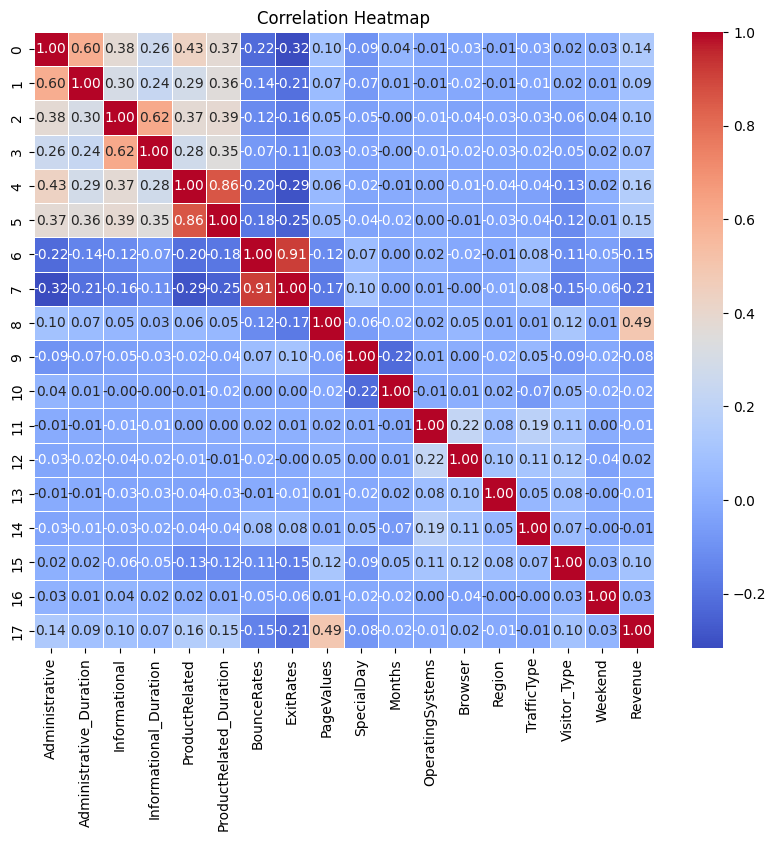

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


In [71]:
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType
column_to_typecast = 'Revenue'
df_backup= df_backup.withColumn('Revenue', col('Revenue').cast(IntegerType()))
df_backup.show()

+--------------+-----------------------+-------------+----------------------+--------------+-----------------------+-----------+-----------+----------+----------+----------------+-------+------+-----------+-------+-------+------------+------+
|Administrative|Administrative_Duration|Informational|Informational_Duration|ProductRelated|ProductRelated_Duration|BounceRates|  ExitRates|PageValues|SpecialDay|OperatingSystems|Browser|Region|TrafficType|Weekend|Revenue|Visitor_Type|Months|
+--------------+-----------------------+-------------+----------------------+--------------+-----------------------+-----------+-----------+----------+----------+----------------+-------+------+-----------+-------+-------+------------+------+
|             0|                    0.0|            0|                   0.0|             1|                    0.0|        0.2|        0.2|       0.0|       0.0|               1|      1|     1|          1|      0|      0|           0|     9|
|             0|            

**PIPELINE**


In [72]:
df_backup.printSchema()

root
 |-- Administrative: long (nullable = true)
 |-- Administrative_Duration: double (nullable = true)
 |-- Informational: long (nullable = true)
 |-- Informational_Duration: double (nullable = true)
 |-- ProductRelated: long (nullable = true)
 |-- ProductRelated_Duration: double (nullable = true)
 |-- BounceRates: double (nullable = true)
 |-- ExitRates: double (nullable = true)
 |-- PageValues: double (nullable = true)
 |-- SpecialDay: double (nullable = true)
 |-- OperatingSystems: long (nullable = true)
 |-- Browser: long (nullable = true)
 |-- Region: long (nullable = true)
 |-- TrafficType: long (nullable = true)
 |-- Weekend: integer (nullable = false)
 |-- Revenue: integer (nullable = true)
 |-- Visitor_Type: integer (nullable = true)
 |-- Months: integer (nullable = true)



In [75]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Feature columns
feature_columns = [
    'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
    'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
    'Visitor_Type', 'Months'
]

# Split the data into training and testing sets
(training_data, test_data) = df_backup.randomSplit([0.8, 0.2], seed=42)

# Define a function for each model pipeline and evaluation
def evaluate_model(model, model_name, param_grid, training_data, test_data):
    # Assemble features into a single vector column
    assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')

    # Create the pipeline
    pipeline = Pipeline(stages=[assembler, model])

    # Accuracy Calculation (Before Hyperparameter Tuning)
    print(f"Accuracy Calculation (Before Hyperparameter Tuning) - {model_name}:")
    initial_model = pipeline.fit(training_data)
    initial_predictions = initial_model.transform(test_data)
    evaluator = BinaryClassificationEvaluator(labelCol='Revenue', metricName='areaUnderROC')
    accuracy_before_tuning = evaluator.evaluate(initial_predictions)
    print(f"Area Under ROC: {accuracy_before_tuning}")

    # Hyperparameter Tuning
    print(f"\nHyperparameter Tuning - {model_name}:")
    crossval = CrossValidator(estimator=pipeline,
                              estimatorParamMaps=param_grid,
                              evaluator=evaluator,
                              numFolds=3)

    # Fit the cross-validator
    cv_model = crossval.fit(training_data)

    # Best Model Selection
    best_model = cv_model.bestModel

    # Accuracy Calculation (After Hyperparameter Tuning)
    print(f"\nAccuracy Calculation (After Hyperparameter Tuning) - {model_name}:")
    tuned_predictions = best_model.transform(test_data)
    accuracy_after_tuning = evaluator.evaluate(tuned_predictions)
    print(f"Area Under ROC: {accuracy_after_tuning}")

    return best_model

# Define parameter grids for hyperparameter tuning
lr_param_grid = ParamGridBuilder().addGrid(lr.regParam, [0.01, 0.1, 0.2]).build()
rf_param_grid = ParamGridBuilder().addGrid(rf.numTrees, [50, 100, 150]).build()
gbt_param_grid = ParamGridBuilder().addGrid(gbt.maxDepth, [5, 10, 15]).build()

# Logistic Regression
lr_model = LogisticRegression(labelCol='Revenue', featuresCol='features', predictionCol='prediction_lr')
best_lr_model = evaluate_model(lr_model, 'Logistic Regression', lr_param_grid, training_data, test_data)

# Random Forest
rf_model = RandomForestClassifier(labelCol='Revenue', featuresCol='features', predictionCol='prediction_rf')
best_rf_model = evaluate_model(rf_model, 'Random Forest', rf_param_grid, training_data, test_data)

# GBT
gbt_model = GBTClassifier(labelCol='Revenue', featuresCol='features', predictionCol='prediction_gbt')
best_gbt_model = evaluate_model(gbt_model, 'GBT', gbt_param_grid, training_data, test_data)


Accuracy Calculation (Before Hyperparameter Tuning) - Logistic Regression:
Area Under ROC: 0.876265806713731

Hyperparameter Tuning - Logistic Regression:

Accuracy Calculation (After Hyperparameter Tuning) - Logistic Regression:
Area Under ROC: 0.876265806713731
Accuracy Calculation (Before Hyperparameter Tuning) - Random Forest:
Area Under ROC: 0.8961098979229085

Hyperparameter Tuning - Random Forest:

Accuracy Calculation (After Hyperparameter Tuning) - Random Forest:
Area Under ROC: 0.8961098979229085
Accuracy Calculation (Before Hyperparameter Tuning) - GBT:
Area Under ROC: 0.9369432735767617

Hyperparameter Tuning - GBT:

Accuracy Calculation (After Hyperparameter Tuning) - GBT:
Area Under ROC: 0.9369432735767617
